## What is the SIR Model?

We introduce **the SIR model**, one of the most basic mathematical models of infectious disease epidemics (epidemics means a particular disease spreading to a large number of cases).

The SIR model was first proposed by W. O. Kermack and A. G. McKendrick in 1927, and later developed into one of the most successful models for infectious diseases, based on which health institutions have established various upgraded models for a wide variety of epidemics. The results predicted by the models provide important reference in the decision-making process of epidemic prevention and control.

## The SIR Model: Introduction

In the SIR model, the population is divided into three groups:

- **S**usceptible: those who have not yet been infected

- **I**nfective: those who have been infected and may infect the susceptible

- **R**ecoverd: those who have recovered from the disease and are no longer affected by the disease for whatever reason

The size of the population in each group are denoted by $S$, $I$ and $R$. We will build the mathematical model that quantifies the variation with time of these numbers.

When a random infective person comes in contact with a random susceptible person, there is a possiblility that the disease will spread. In the model, we assume that each susceptible person has the same probability of coming into contact with any other infective object and also an equal probability of getting infected.

Let's define the **infection rate** $\beta$ as the probability that a random infective person infects a random susceptible person per unit time , then the expected number of new cases in a time period of $\Delta t$ is $SI \times \beta \Delta t$. This leads to a decrease in the number of susceptible people:

$$ \Delta S = -SI \times \beta \Delta t$$

In the mean time, we expect that some of the infective people will recover from the disease (it could be the work of their immune systems or medical intervention). We similarly introduce the **recovery rate** $\gamma$ as the probablity of recovery in unit time for each patient. During the interal $\Delta t$, a random infective person has a probability of $\gamma \Delta t$ to recover. This causes an increase by $I \times \gamma \Delta t$ in the size of the recovered group, so

$$ \Delta R = I \times \gamma \Delta t $$

For the infective group, every now and then, there are some new victims from the susceptible group getting infected, causing a rise in the number of infective people. However, a fraction of the group is recovered and removed, causing a decrease in the group size. Put these together, we have the change in the size of infective group:

$$ \Delta I = SI \times \beta \Delta t - I \times \gamma \Delta t$$

The relations between $S$, $I$ and $R$ can be symbollically represented by a flowchart:

$$ S \xrightarrow{\beta SI} I \xrightarrow{\gamma I} R$$

If we take the limit of $\Delta t \to 0$, then the difference equations above can be written as differential equations:

$$\color{blue}{\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} & = -\beta SI\\
\frac{\mathrm{d} I}{\mathrm{d} t} & = \beta SI - \gamma I\\
\frac{\mathrm{d} R}{\mathrm{d} t} & = \gamma I\\
\end{aligned}}$$

The system of equations formed by these three first-order differential equations lies at the core of the SIR model.

There is no simple analytical solution to this system of equations for any given initial conditions. We will use numerical solutions later to explore how infectious diseases spread in the SIR model.

## Simulation of the SIR model

Let's imagine a situation where a new kind of disease suddenly appears, so for the time being only very few people are infected, the number of recovered people is practically zero, while nearly the entire population is the susceptible group.

We simulate the spread of this disease by setting $I_0$ to be a small number $\epsilon$, $R_0 = 0$, then $S_0 = N- \epsilon$ where $N$ is the total number of the community. The spread of the disease is then simulated for different values of $\beta$ and $\gamma$.

By spirit of Euler method, we can rearrange the differential equations to construct a set of difference equations for the computer to work with. With the size of each group at time $t$, their sizes at time $t+\Delta t$ are given by:

$$\color{blue}{\begin{aligned}
S[t+\Delta t] & = S[t] -\beta S[t]I[t]\Delta t\\
I[t+\Delta t] & = I[t] + \beta S[t]I[t]\Delta t - \gamma I[t]\Delta t\\
R[t+\Delta t] & = R[t] + \gamma I[t]\Delta t\\
\end{aligned}}$$

You are invited to read through the codes, and see how the Euler method is implemented.

In [1]:
# import libraries for computation and graph plotting
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def SIR_model(init_values, t, beta, gamma):
    # initialising the population size for each group
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    
    # set up initial conditions
    S[0], I[0], R[0] = init_values
    N = sum(init_values)
    
    # use the three SIR equations to compute values of S, I, and R one time step after another
    for i in range(1, len(t)):
        if I[i-1] + (beta * S[i-1] * I[i-1] - gamma * I[i-1]) * step > N:
            # in case beta is too large to cause overflow
            I[i] = N
            S[i] = 0
        else:
            # reasonable beta: SIR equations at work
            S[i] = S[i-1] - beta * S[i-1] * I[i-1] * step
            I[i] = I[i-1] + (beta * S[i-1] * I[i-1] - gamma * I[i-1]) * step
        R[i] = R[i-1] + gamma * I[i-1] * step
        
    # return outputs as three numpy arrays
    return S, I, R

In [3]:
def plot_SIR(init_values, t, beta, gamma):
    # compute the S, I, R values
    S, I, R = SIR_model(init_values, t, beta, gamma)
    
    # plotting the SIR curves
    plt.plot(t, S, color = 'blue', label = 'Susceptible')
    plt.plot(t, I, color = 'red', label = 'Infective')
    plt.plot(t, R, color = 'green', label = 'Recovered')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.show()

All set up, ready to go! The following code block produces a plot for one specific choice of $\beta$ and $\gamma$. You can change the parameters as you like, and check out what the consequences are!

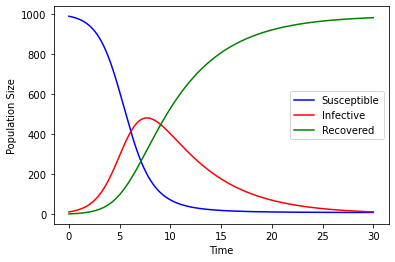

In [4]:
# set up simulation time
tmax = 30
step = 0.01
t = np.arange(0, tmax, step)

# set up initial values for SIR model
init_values = [990, 10, 0]     # S0, I0, R_0
beta = 0.001
gamma = 0.2

# plot predictions from the SIR equations
plot_SIR(init_values, t, beta, gamma)

## The reduced model

The simulation of the SIR model can actually be done in a more elegant way.

Let's assume the size of the entire population remains unchanged, i.e., $N = S + I + R = \text{constant}$. Introducing dimensionless parameters:

$$ \hat{S} = \frac{S}{N} \qquad \hat{I} = \frac{I}{N} \qquad \hat{R} = \frac{R}{N} \qquad \tau = \gamma t$$

where $\hat{S}$, $\hat{I}$ and $\hat{R}$ can be thought as the fraction of each group in the entire population, and $\tau$ is the reduced time. The SIR equations can be rewritten as:

$$\color{blue}{\begin{aligned}
\frac{\mathrm{d} \hat{S}}{\mathrm{d} \tau} & = - \mathcal{R}_0 \hat{S}\hat{I}\\
\frac{\mathrm{d} \hat{I}}{\mathrm{d} \tau} & = \mathcal{R}_0 \hat{S}\hat{I} - \hat{I} \\
\frac{\mathrm{d} \hat{R}}{\mathrm{d} \tau} & = \hat{I} \\
\end{aligned}}$$

where $\mathcal{R}_0 \equiv \frac{\beta N}{\gamma}$. Here we can see the behaviour of the SIR equations actually depends on $\mathcal{R}_0$ only. The parameter $\mathcal{R}_0$ is usally called the **basic reproduction ratio**. We will see its intepretation very soon.

By the way, it is an aweful choice of notation of $\mathcal{R}_0$  to stand for the basic reproduction ratio. Do not confuse it with the initial number of recovered people $R_0$. In this article, I use squiggle and regular fonts to distinguish the two. But the notation $\mathcal{R}_0$ has now become standard norm in the mainstream literature.

The constraint that the size of entire population is fixed becomes:

$$\hat{S} + \hat{I}+ \hat{R} = 1$$

#### Implementation of the reduced model

Based on the codes we had before, we can easily come up with the simulation for the reduced model.

You can also play with a web-based SIR simulator via [[https://faradars.org/ev/sir-simulator?lang=en]](https://faradars.org/ev/sir-simulator?lang=en).

In [5]:
def reduced_model(init_values, t, r):
    # SIR model in terms of three differential equations
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    
    S[0], I[0], R[0] = init_values
    
    for i in range(1, len(t)):
        S[i] = S[i-1] - r * S[i-1] * I[i-1] * step
        I[i] = I[i-1] + (r * S[i-1] * I[i-1] - I[i-1]) * step
        R[i] = R[i-1] + I[i-1] * step
    return S, I, R

In [6]:
def plot_reduced(init_values, t, r):
    # plot the variation in time of the proportions of S/I/R groups 
    S, I, R = reduced_model(init_values, t, r)
    
    plt.plot(t, S, color = 'blue', label = 'Susceptible')
    plt.plot(t, I, color = 'red', label = 'Infective')
    plt.plot(t, R, color = 'green', label = 'Recovered')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.show()

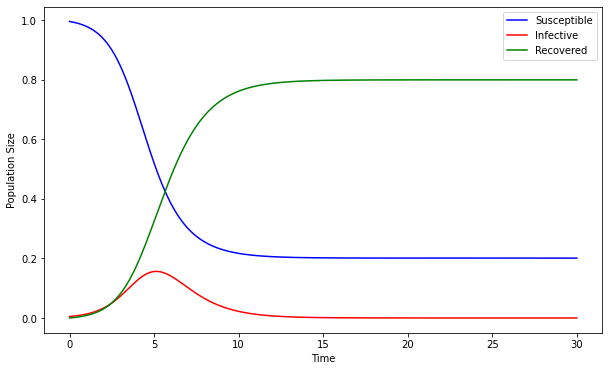

In [7]:
# set up simulation time
tmax = 30
step = 0.01
t = np.arange(0, tmax, step)

# set up initial values for SIR model
init_values = [0.995, 0.005, 0]     # S0, I0, R_0
r = 2

# plot predictions from the SIR equations
plot_reduced(init_values, t, r)

### Discussions

The results of the simulations for a set of different values of $\mathcal{R}_0$ are summarised below:

![]()

As you can see, the magnitude $\mathcal{R}_0$ determines whethere the disease becomes an epidemics and spreads to a lot of people in a given time. Larger value for $\mathcal{R}_0$ indicates that the disease is able to spread faster and wider.

When $\mathcal{R}_0 < 1$，the speed and the scale at which the disease spreads are limited. Most infective recover before the disease has time to spread. Most people do not even have a chance to be infected, and the disease will even without human intervention.

However, if $\mathcal{R}_0 > 1$, the spread of the disease zooms like a rock. For instance, for $\mathcal{R}_0 = 1.2$, It seems that one person can infect just a little more than one person, and the number of infective at any time does not seem to be many, but in the end nearly $30\%$ of the entire population will have been affected by this infectious disease. When it increases slightly to $\mathcal{R}_0 = 1.5$, the proportion of the population affected by the epidemic doubles to around $60\%$!


When it reaches $\mathcal{R}_0 = 3$, more than $90\%$ of the population will get the disease once after the epidemic breaks out. At the peak of the outbreak, nearly 30% of the population are infected, quite a terrifying scale of transmission.

When $\mathcal{R}_0 = 5$ and $\mathcal{R}_0 \approx 10$ (an estimated value for the Omicron Covid variant)，if the spread of the disease does follow the SIR equations, we can see how terrible this would be. In the early stages of the outbreak, the number of cases increases very rapidly. At its peak, half or more of the population are infected. In the end, almost everyone has been infected.